<a href="https://colab.research.google.com/github/Abhikad/Abhikad/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

Readng Dataset - Lets look at the data



In [3]:
data = pd.read_csv('/content/drive/MyDrive/Capstone /bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Bank client data: Summary of the columns



#independent variables:-

1 - age 

2 - job

3 - marital 

4 - education

5 - default: has credit in default? 

6 - housing: has housing loan? 

7 - loan: has personal loan? 

8 - contact: type of communication 

9 - month: last contact month of year 

10 - day_of_week: last contact day of the week 

11 - duration: last contact duration, in seconds 

12 - campaign: number of contacts performed during this campaign and for this client 

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign 

14 - previous: number of contacts performed before this campaign and for this client 

15 - poutcome: outcome of the previous marketing campaign 


#Target Variable:-

16 - y - has the client subscribed a term deposit?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column

**Describe function** = The purpose of using describe function is to check for Count, Minimum, Maximum, Average, percentile values of the numerical columns, so that we can easily identify if the outliers are present in the particular column or used to calculate upper whisker, lower whisker values

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Checking for null values = if any null values found we can replace it 

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

We can identify that there were no null values are present across the cloumns

**Outliers Analysis**

Why is the treatment on outliers are necessary because An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data

***Boxplot*** = used to find out the percentage of outliers across the columns

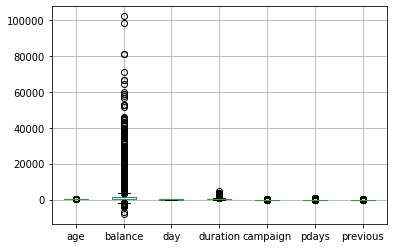

In [7]:
data.boxplot()

We can identify that the column names 'balance' and 'duration' are having more numbers of ouliers present so lets plot a boxlplot to visualize it

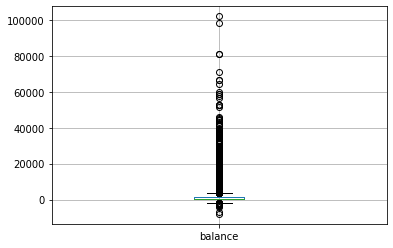

In [8]:
data.boxplot('balance')

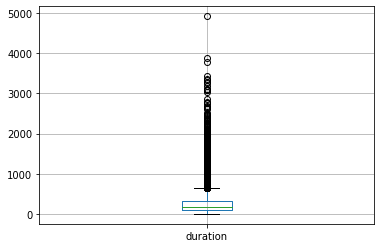

In [9]:
data.boxplot('duration')

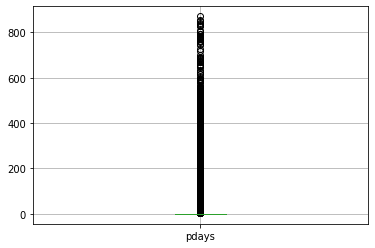

In [10]:
data.boxplot('pdays')

In [11]:
data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

We can identify by looking at above that there are 75 % of the data in a column 'pdays' is of negative values, by droping those many entries from the dataset we can loose 75% data  

**Histogram** – To find out the skewnwss of the data

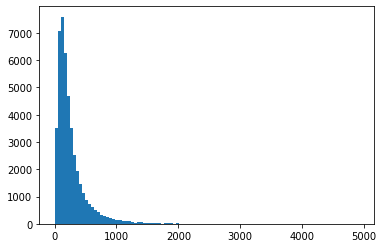

In [12]:
plt.hist(data.duration,bins=100)
plt.show()




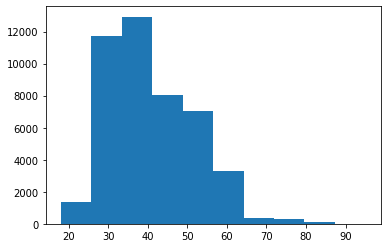

In [13]:
plt.hist(data.age,bins=10)
plt.show()

(array([2.0000e+00, 1.0000e+00, 5.9000e+01, 2.8267e+04, 1.1258e+04,
        2.9540e+03, 1.1840e+03, 5.9300e+02, 3.0300e+02, 1.9900e+02,
        8.8000e+01, 8.2000e+01, 4.4000e+01, 4.4000e+01, 3.6000e+01,
        2.2000e+01, 2.0000e+01, 6.0000e+00, 5.0000e+00, 5.0000e+00,
        8.0000e+00, 3.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00,
        0.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ -8019.  ,  -5816.08,  -3613.16,  -1410.24,    792.68,   2995.6 ,
          5198.52,   7401.44,   9604.36,  11807.28,  14010.2 ,  16213.12,
         18416.04,  20618.96,  22821.88,  25024.8 ,  27227.72,  29430.64,
         31633.56,  33836.48,  36039.4 ,  38242.32,  40445.24,  42648.16,
         44851.08,  47

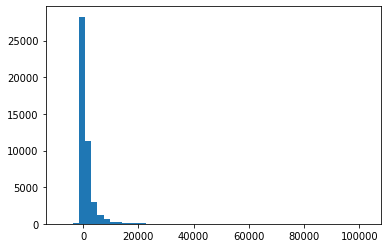

In [14]:
plt.hist(data.balance,bins=50)

We can identify that the data is left skewed so lets check another mothod calles skewness and kurtosis to look for it

**Skewness** - Skewness refers to normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [15]:
from scipy.stats import skew
skew(data['pdays'])

2.615628689259389

In [16]:
skew(data['balance'])

8.360030947252687

In [17]:
skew(data['age'])

0.6847952047866451

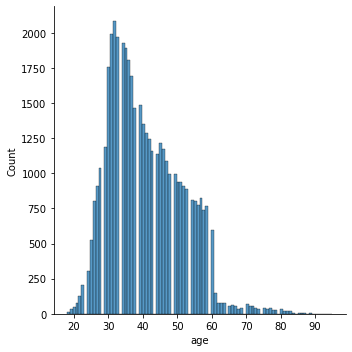

In [18]:
sns.displot(data['age'])
plt.show()

In [19]:
skew(data['duration'])

3.1442137770103913

**Kurtosis** = calculates the kurtosis of a data set, It is a measure of the “tailedness”
1. kurtosis > 3 = it is having very long and skinny tails, which means there are more chances of outliers.
2. kurtosis < 3 = it having a lower tail and stretched around center tails means most of the data points are present in high proximity with mean
3. kurtosis = 3 = it is same as the normal distribution, which means kurtosis is near to 0

In [20]:
from scipy.stats import kurtosis
kurtosis(data['pdays'],bias=False)

6.935195210422798

In [21]:
kurtosis(data['balance'],bias=False)

140.7515466250416

In [22]:
kurtosis(data['age'],bias=False)

0.3195703759105042

In [23]:
kurtosis(data['duration'],bias=False)

18.153915269019702

In [24]:
kurtosis(data['pdays'],bias=False)

6.935195210422798

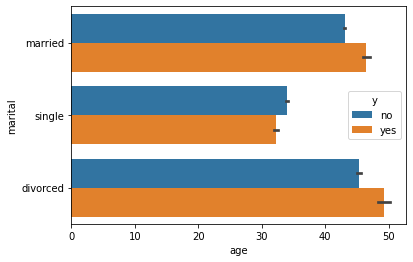

In [25]:
sns.barplot(data=data,x=data['age'],y=data['marital'],hue=data['y'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


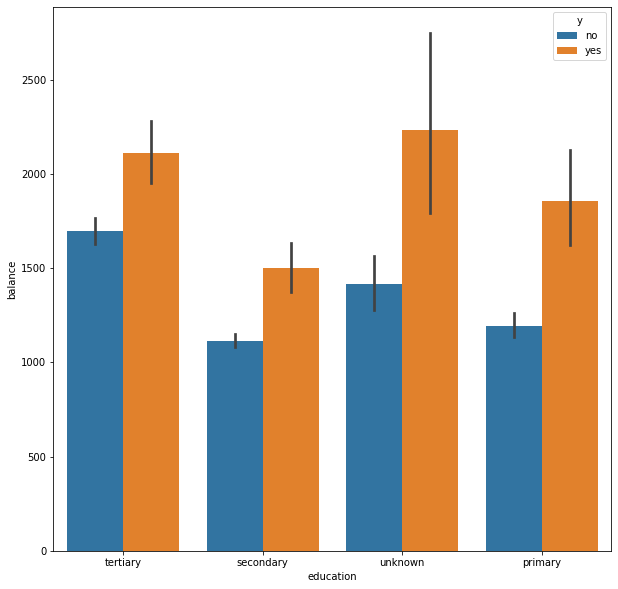

In [26]:
plt.figure(figsize=(10,10))
sns.barplot(data['education'],data['balance'], hue=data['y'])

*Unique Values across all columns by using nunique function*

In [27]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

*Duplicate values across all columns by using "duplicated"* to avaoid any redundancy of the datra

In [28]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


**Heatmap** = This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data

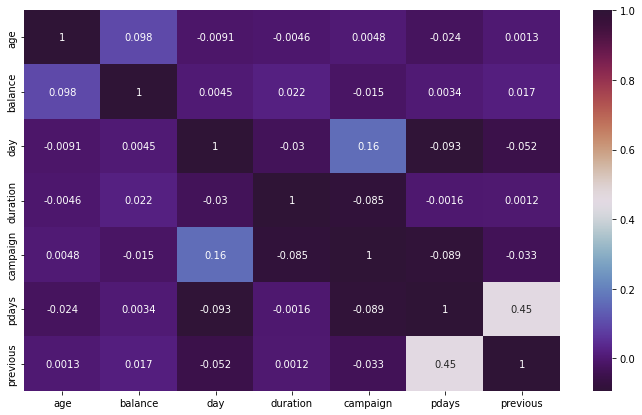

In [29]:
plt.figure(figsize=(12,7))
dataplot=sns.heatmap(data.corr(),annot=True,cmap= 'twilight_shifted')

By looking at above Heatmap we can get to know that the data is not highly correlated with each other. 



In [30]:
data.corr(method='pearson')

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


**Regression Plot** = useful for detecting outliers, unusual observations

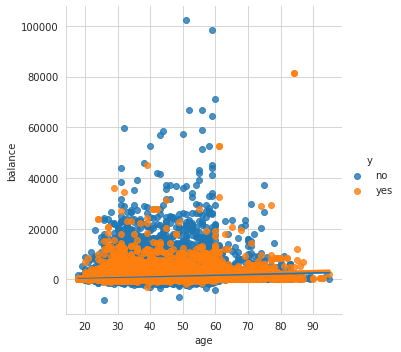

In [31]:
sns.set_style('whitegrid')
sns.lmplot(x ='age', y ='balance', hue='y', data = data)
plt.show()

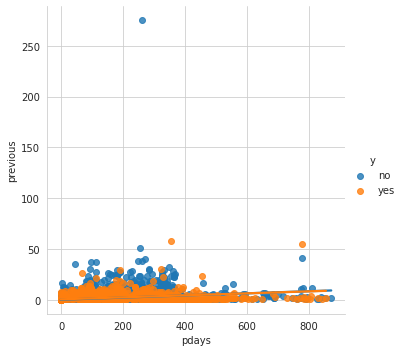

In [32]:
sns.set_style('whitegrid')
sns.lmplot(x ='pdays', y ='previous', hue='y', data = data)
plt.show()

**Bar Plot** - A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and 
heights that is proportional to the values which they represent

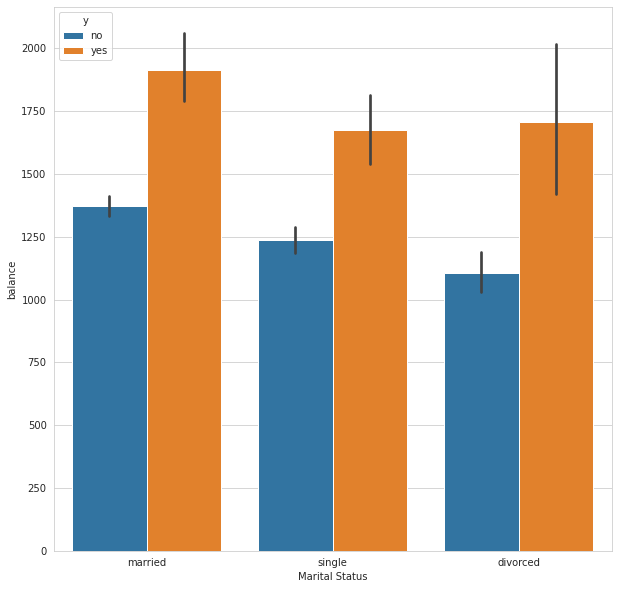

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x='marital',y='balance',hue='y',data=data)
plt.xlabel('Marital Status')
plt.ylabel('balance')
plt.show()

By looking at above Barplot we can get to know that married person with high balance will likely to subscribed a term deposit than single and divorced

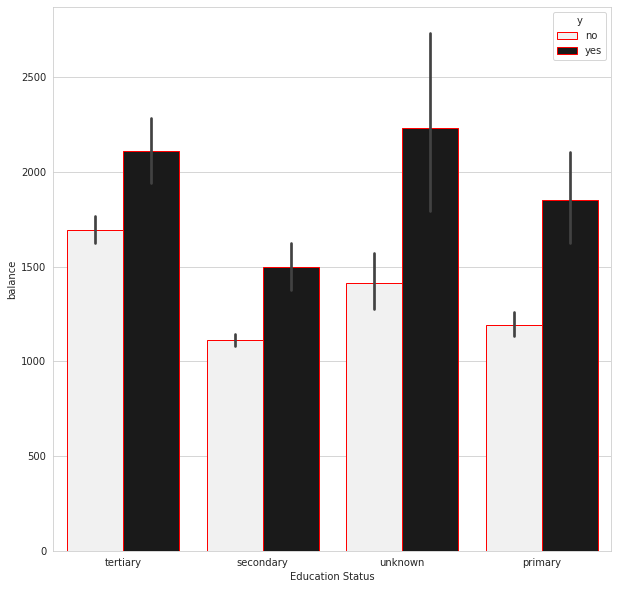

In [34]:
plt.figure(figsize=(10,10))
sns.barplot(x='education',y='balance',hue='y',data=data, color=(0.1, 0.1, 0.1, 0.1),edgecolor='red')
plt.xlabel('Education Status')
plt.ylabel('balance')
plt.show()

By looking at above Barplot we can get to know that education is not that much necessary to subscribed a term deposit 

**Pair plot** - used to visualize relationships between each variable

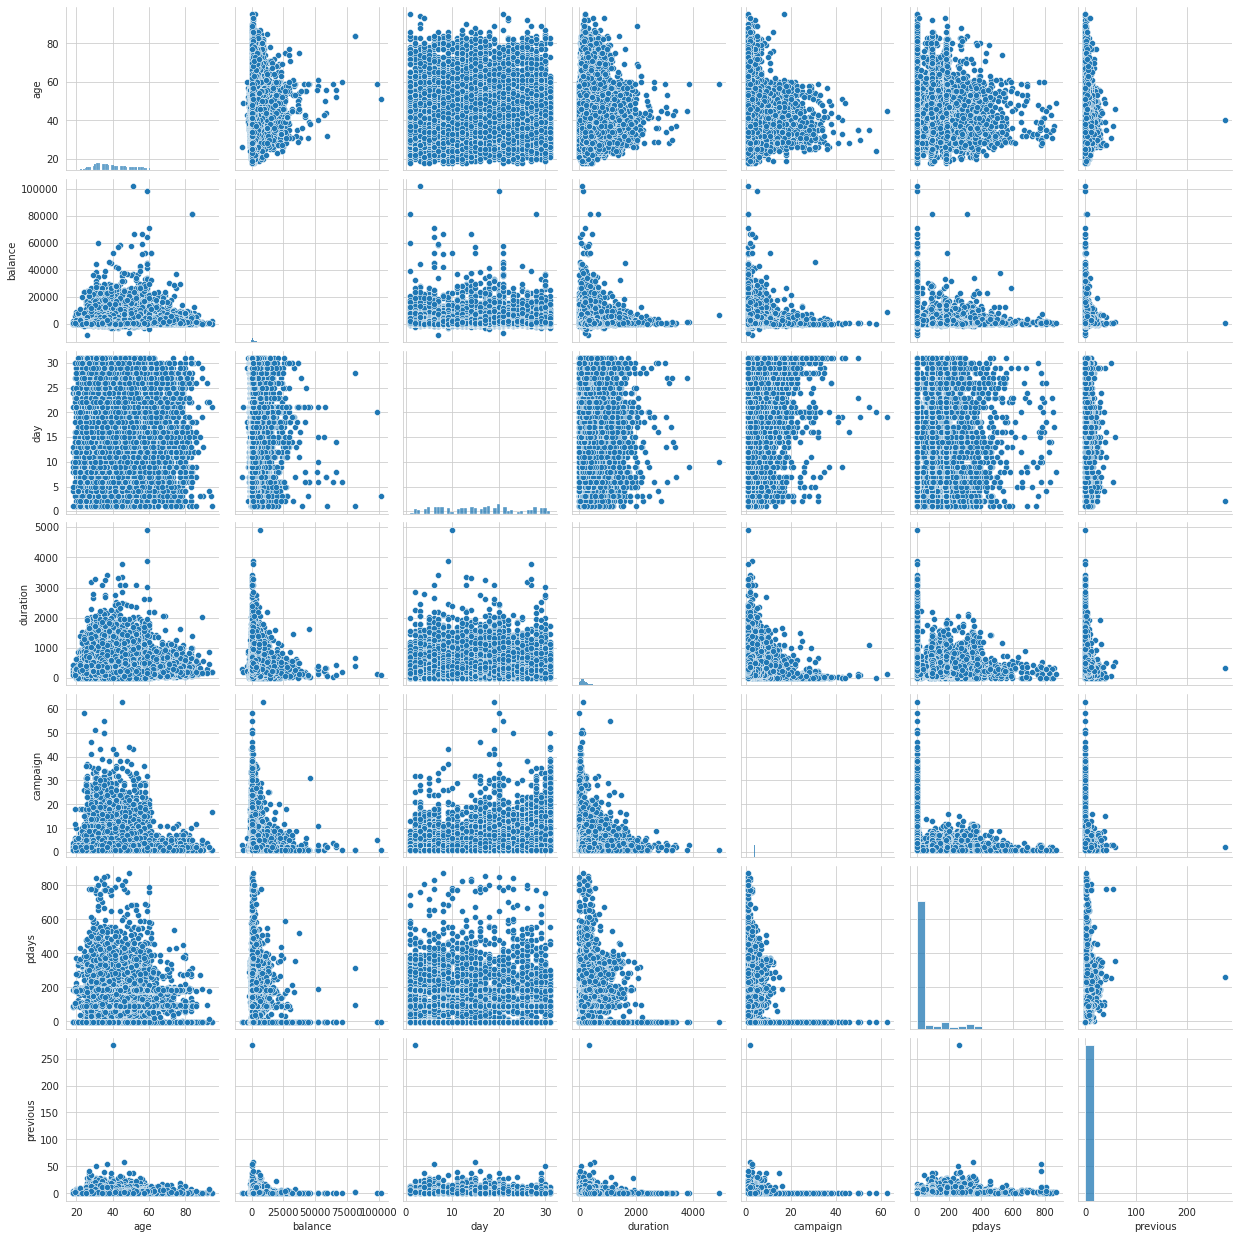

In [35]:
sns.pairplot(data,diag_kind="hist")
plt.show()

In [36]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [37]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print(numerical)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


**Outliers Treatment**

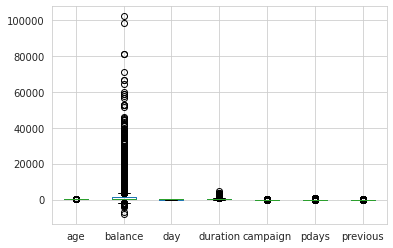

In [38]:
data.boxplot()

*Removing outliers in 'duration' using IQR method*

*IQR method* = The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. 

In [39]:
data['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [40]:
#IQR Method
q1 = np.quantile(data['duration'],0.25)
q2 = np.quantile(data['duration'],0.50)
q3 = np.quantile(data['duration'],0.75)
print(q1)
print(q2)
print(q3)

103.0
180.0
319.0


In [41]:
IQR = q3-q1
IQR

216.0

In [42]:
# Upper Whisker and lower Whisker
uw = q3 + (1.5*IQR)
lw = q1 - (1.5*IQR)
print(uw)
print(lw)

643.0
-221.0


In [43]:
Outliers = []
for i in data['duration']:
    if i > uw:
        Outliers.append(i)
print(Outliers)

[1666, 1492, 787, 1778, 812, 1042, 1467, 1389, 849, 677, 2033, 673, 1056, 717, 683, 1077, 1419, 730, 746, 702, 714, 962, 742, 669, 680, 808, 652, 1201, 1030, 769, 673, 744, 765, 1623, 678, 699, 1677, 918, 1297, 1906, 703, 802, 684, 739, 1597, 1529, 720, 852, 923, 953, 732, 1521, 800, 1138, 786, 799, 866, 1581, 650, 1101, 912, 690, 1062, 688, 2177, 764, 1273, 1574, 984, 1689, 697, 944, 1102, 943, 813, 1040, 1084, 923, 693, 690, 1119, 1120, 784, 665, 712, 1007, 667, 982, 756, 807, 2087, 650, 1120, 956, 985, 672, 1187, 826, 732, 847, 659, 772, 929, 710, 705, 2462, 825, 646, 653, 1028, 654, 1087, 1692, 2016, 1054, 1170, 665, 1713, 663, 1080, 1461, 750, 1178, 752, 878, 834, 1534, 836, 1002, 757, 1147, 820, 788, 832, 1495, 646, 744, 891, 1083, 1266, 793, 1727, 1875, 907, 723, 704, 1346, 1386, 3366, 1000, 2231, 705, 665, 1167, 806, 766, 1015, 683, 730, 768, 1001, 845, 853, 813, 916, 753, 708, 805, 901, 788, 851, 1052, 916, 647, 771, 1106, 945, 816, 1721, 1032, 735, 942, 832, 824, 1553, 1328, 

In [44]:
numofol = len(Outliers)
numofol

3235

In [45]:
numofvals = len(data['duration'])
numofvals

45211

In [46]:
percentofol = round(numofol/numofvals,2)*100
percentofol

7.000000000000001

I identified that there are only 7 % of outliers are present in a column duration so lets remove that 

In [47]:
data = data[data['duration'] >= lw] 
data = data[data['duration'] <= uw] 

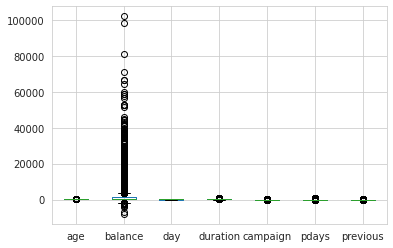

In [48]:
data.boxplot()

In [49]:
data['duration'].describe()

count    41976.000000
mean       203.490947
std        140.805074
min          0.000000
25%         98.000000
50%        167.000000
75%        277.000000
max        643.000000
Name: duration, dtype: float64

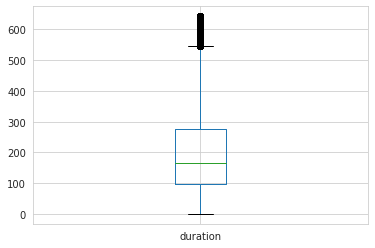

In [50]:
data.boxplot('duration')


In [51]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,41976.000000,41976.000000,41976.000000,41976.000000,41976.000000,41976.000000,41976.000000
mean,40.928078,1347.342338,15.818039,203.490947,2.775253,40.585978,0.586025
std,10.577813,3036.060405,8.340794,140.805074,3.135008,100.646807,2.344725
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,8.000000,98.000000,1.000000,-1.000000,0.000000
50%,39.000000,439.000000,16.000000,167.000000,2.000000,-1.000000,0.000000
75%,48.000000,1407.000000,21.000000,277.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,643.000000,63.000000,871.000000,275.000000


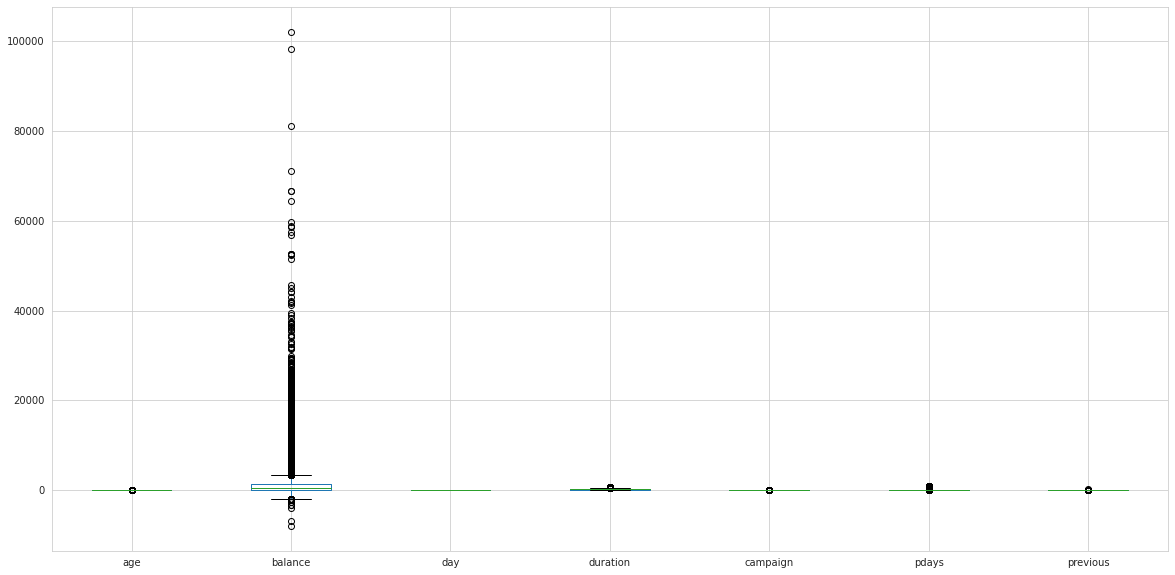

In [52]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.show()

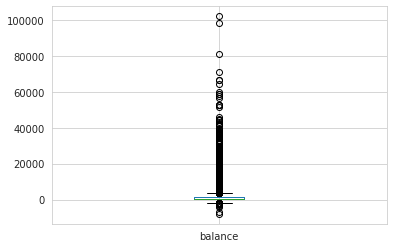

In [53]:
data.boxplot('balance')

**Z-Score** Method for removing Outliers from column 'balance'

Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean

In [54]:
mean = np.mean(data['balance'])
std = np.std(data['balance'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 1347.3423384791308
std. deviation is 3036.024240912663


In [55]:
threshold = 3
outlier = []
count=0
for i in data['balance']:
    count+=1
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
        print(count)
print('outlier in dataset is', outlier)

35
65
311
866
1937
2324
2387
2408
2450
2451
2597
2665
2709
2738
2745
2812
2821
2893
2981
3100
3537
3729
3781
3833
3846
4162
4257
4296
4497
4501
4594
4598
4613
4641
4755
4859
4887
4908
4912
4915
5059
5198
5304
5882
5967
5969
6063
6148
6298
6340
6387
6521
6586
6658
6670
6696
6698
6726
6848
7002
7029
7087
7135
7192
7226
7302
7423
7440
7617
7664
7761
7789
7842
7878
7885
7933
7954
7984
8026
8087
8108
8205
8227
8407
8427
8437
8474
8514
8530
8584
8646
8751
8755
8787
8798
8857
8873
8885
8897
8917
8943
9089
9100
9104
9113
9119
9202
9238
9336
9356
9358
9359
9400
9459
9466
9541
9543
9691
9694
9761
9855
9863
9904
9923
9998
10089
10211
10226
10297
10361
10390
10429
10513
10518
10544
10564
10612
10703
10890
10930
10943
10977
11046
11072
11088
11117
11255
11277
11295
11304
11396
11428
11950
12032
12252
12286
12561
12914
13050
13778
13810
13905
13931
14008
14392
14709
15097
15119
15152
15320
15625
15627
15925
16151
16396
16538
16559
16597
16622
16710
16759
16891
16894
16989
16990
17314
17404
17476
175

In [56]:
len(outlier)

690

Out of 45211 rows there were 690 rows considt of outliers in column balance so lets remove it

In [57]:
data.loc[data[data['balance']>=10635].index]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
334,45,management,divorced,tertiary,no,24598,yes,no,unknown,5,may,313,3,-1,0,unknown,no
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,no
2065,55,retired,married,secondary,no,18722,yes,no,unknown,12,may,128,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45075,28,technician,single,tertiary,no,11862,no,no,cellular,21,oct,549,2,238,13,other,yes
45097,61,self-employed,married,tertiary,no,10861,no,no,cellular,25,oct,225,1,91,5,success,yes
45098,44,technician,single,unknown,no,11115,no,no,cellular,25,oct,189,1,185,4,success,no
45118,78,retired,married,primary,no,14204,no,no,cellular,26,oct,150,1,183,1,other,no


In [58]:
data2=data[data['balance']>=10635]


In [59]:
data=data.drop(data2.index,axis=0)

In [60]:
data['balance']=np.where(data['balance']<0,0,data['balance'])

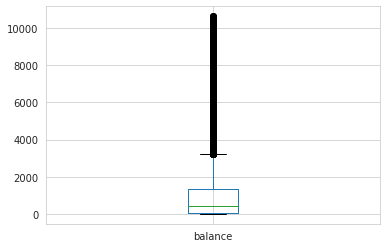

In [61]:
data.boxplot('balance')

**Data Balancing**

The main reason for data balancing is to give equal priority to each class in laymen terms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


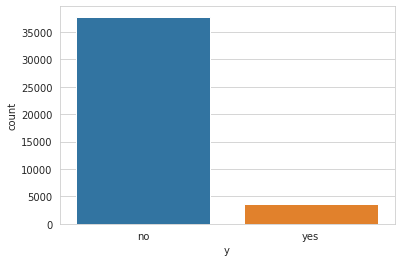

In [62]:
sns.countplot(data['y'])
plt.show()

From above countplot we can identify the data from 'y' column is highly unbalance

In [63]:
majority = data[data.y=='no']
minority = data[data.y=='yes']

In [64]:
majority.shape

(37752, 17)

In [65]:
minority.shape

(3553, 17)

By looking at above values i noticed that less than 10% of values were stating 'YES' in column y so it is highly imbalance data so lets balance it by using resampling technique

Sampling of minority class

In [66]:
from sklearn.utils import resample

In [67]:
resampling = resample(minority, replace = True, n_samples = 37752) 

In [68]:
balanced_data = pd.concat([majority, resampling])

In [69]:
balanced_data.to_csv('modified_data.csv', encoding = 'utf-8', index = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


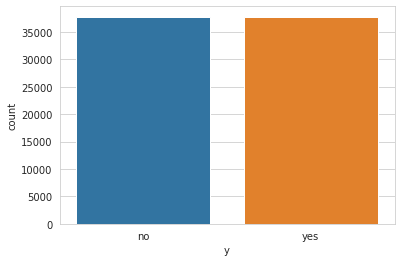

In [70]:
sns.countplot(balanced_data['y'])
plt.show()

In [71]:
df = pd.read_csv('modified_data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [72]:
df.shape

(75504, 17)

In [73]:
df1=df.copy()

**Train Test Split** - Spliting the data for training and testing purpose and apply Standard scaling on training dataset

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
labelencoder=LabelEncoder()

**Label Encoding** is used to convert the labels into a numeric form so as to convert them into the machine-readable form

**Standardization using StandardScaler**

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation

In [75]:
df['job'] = labelencoder.fit_transform(df['job'])
df['marital'] = labelencoder.fit_transform(df['marital'])
df['education'] = labelencoder.fit_transform(df['education'])
df['default'] = labelencoder.fit_transform(df['default'])
df['housing'] = labelencoder.fit_transform(df['housing'])
df['loan'] = labelencoder.fit_transform(df['loan'])
df['contact'] = labelencoder.fit_transform(df['contact'])
df['month'] = labelencoder.fit_transform(df['month'])
df['poutcome'] = labelencoder.fit_transform(df['poutcome'])
df['y'] = labelencoder.fit_transform(df['y'])

In [76]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75499,32,9,1,2,0,4654,1,1,0,20,9,276,1,128,2,0,1
75500,31,4,2,2,0,533,0,0,0,12,9,90,3,93,6,2,1
75501,25,4,2,2,0,528,0,0,0,14,1,201,1,-1,0,3,1
75502,35,6,1,2,0,3698,1,0,0,5,7,106,1,-1,0,3,1


In [77]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

In [79]:
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

Here we choose 70% of the data for Training and 30% of the data is for Testing purpose

In [80]:
print('x Train data\n', x_train_std)

x Train data
 [[ 3.03981756  0.13822798 -0.33952561 ...  1.87259841  2.93464307
  -0.39737615]
 [-0.75285128 -1.10195793 -0.33952561 ... -0.52383139 -0.35705221
   0.57135652]
 [ 0.94174544 -1.41200441 -0.33952561 ... -0.52383139 -0.35705221
   0.57135652]
 ...
 [-1.15632668 -1.10195793 -1.93658931 ...  2.60194661  0.74017955
  -2.33484147]
 [-0.59146111 -0.1718185  -0.33952561 ...  0.38785386  0.74017955
  -2.33484147]
 [ 0.29618478 -1.10195793 -0.33952561 ... -0.52383139 -0.35705221
   0.57135652]]


In [81]:
print('x Test data\n', x_test_std)


x Test data
 [[-0.6721562  -0.1718185  -0.33952561 ...  2.3327824   0.00869171
  -2.33484147]
 [-1.15632668 -1.41200441 -0.33952561 ... -0.52383139 -0.35705221
   0.57135652]
 [-0.02659554 -1.41200441  1.25753809 ...  2.87979355  3.66613091
  -0.39737615]
 ...
 [ 0.61896511 -1.41200441 -0.33952561 ... -0.52383139 -0.35705221
   0.57135652]
 [ 0.86105035  0.75832093 -0.33952561 ...  3.478901    0.37443563
  -2.33484147]
 [ 1.82939133 -0.79191145 -0.33952561 ... -0.52383139 -0.35705221
   0.57135652]]


In [82]:
print('y Train data\n', y_train)

y Train data
 44603    1
48798    1
21975    0
69290    1
18214    0
        ..
50102    1
15754    0
32764    0
24031    0
692      0
Name: y, Length: 52852, dtype: int64


In [83]:
print('y Test data\n', y_test)

y Test data
 37756    1
5901     0
60091    1
57950    1
32607    0
        ..
72951    1
30423    0
2684     0
62541    1
67117    1
Name: y, Length: 22652, dtype: int64


Model 1 - **Decision Tree Classifier**

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
clf = DecisionTreeClassifier()

In [86]:
%%timeit
model = clf.fit(x_train_std, y_train)
model

1 loop, best of 5: 298 ms per loop


In [87]:
y_pred = clf.predict(x_test_std)
y_pred[:10]

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [88]:
# Comparing Actual Vs Predicted Data
comp = pd.DataFrame({"Actual": y_test, "Predicted":y_pred})
comp

,Actual,Predicted
37756,1,1
5901,0,0
60091,1,1
57950,1,1
32607,0,0
...,...,...
72951,1,1
30423,0,0
2684,0,0
62541,1,1


In [89]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix is:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix is:
 [[10619   764]
 [   11 11258]]


In [90]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11383
           1       0.94      1.00      0.97     11269

    accuracy                           0.97     22652
   macro avg       0.97      0.97      0.97     22652
weighted avg       0.97      0.97      0.97     22652



In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


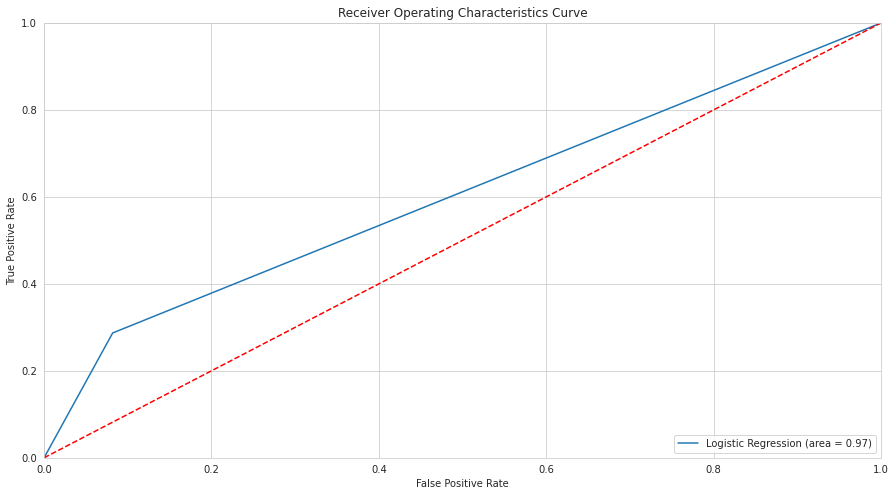

In [92]:
roc_score = roc_auc_score(y_test, clf.predict(x_test_std))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

ROC is receiver operationg characteristic. 

In this curve x axis is false positive rate and y axis is true positive rate

If the curve in plot is closer to left-top corner, test is more accurate.

Roc curve score is auc that is computation area under the curve from prediction scores

We want auc to closer 1

**Cross Validation**

Cross-validation is a technique for evaluating a machine learning model and testing its performance

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
all_output1 = cross_val_score(estimator = clf, X = x_train_std, y = y_train, cv = 5)

In [95]:
print('Accuracies from all CV', all_output1)


Accuracies from all CV [0.96499858 0.96679595 0.96102176 0.96130558 0.9628193 ]


In [96]:
print('Overall Accuracy of this Model:', (all_output1.mean()*100))

Overall Accuracy of this Model: 96.33882347297596


Model 2 - **Naive Bayes**

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
classifier = GaussianNB()

In [99]:
%%timeit
classifier.fit(x_train_std, y_train)

100 loops, best of 5: 13.7 ms per loop


In [100]:
%%timeit
model=classifier.fit(x_train_std, y_train)
model

100 loops, best of 5: 13.8 ms per loop


In [101]:
y_pred = classifier.predict(x_test_std)

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6938 4445]
 [1682 9587]]


In [103]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.61      0.69     11383
           1       0.68      0.85      0.76     11269

    accuracy                           0.73     22652
   macro avg       0.74      0.73      0.73     22652
weighted avg       0.74      0.73      0.73     22652



**Cross Validation**

In [104]:
all_output2 = cross_val_score(estimator = classifier, X = x_train_std, y = y_train, cv = 5)

In [105]:
print('Accuracies from all CV', all_output2)

Accuracies from all CV [0.74174629 0.73134046 0.7371807  0.72838221 0.7384106 ]


In [106]:
print('Overall Accuracy of this Model:', (all_output2.mean()*100))

Overall Accuracy of this Model: 73.54120513387558


Model 3 = **Gradient Boosting Classifier**

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
gb=GradientBoostingClassifier()

In [109]:
%%timeit
model = gb.fit(x_train_std,y_train)
model

1 loop, best of 5: 7.45 s per loop


In [110]:
y_pred = gb.predict(x_test_std)
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [111]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     11383
           1       0.84      0.90      0.87     11269

    accuracy                           0.86     22652
   macro avg       0.86      0.86      0.86     22652
weighted avg       0.86      0.86      0.86     22652



**Cross Validation**

In [112]:
all_output3 = cross_val_score(estimator = gb, X = x_train_std, y = y_train, cv = 5)

In [113]:
print('Accuracies from all CV', all_output3)

Accuracies from all CV [0.86576483 0.86254848 0.86603595 0.85789972 0.8614948 ]


In [114]:
print('Overall Accuracy of this Model:', (all_output3.mean()*100))

Overall Accuracy of this Model: 86.27487547150426


Model 4 = **Random Forest Classifier**

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf = RandomForestClassifier()

In [117]:
#Train the model using the training sets y_pred=clf.predict(X_test)
%%timeit
rf.fit(x_train_std,y_train)

1 loop, best of 5: 6.06 s per loop


In [118]:
y_pred=rf.predict(x_test_std)

In [119]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9783683559950557


In [120]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11383
           1       0.96      1.00      0.98     11269

    accuracy                           0.98     22652
   macro avg       0.98      0.98      0.98     22652
weighted avg       0.98      0.98      0.98     22652



**Cross Validation**

In [121]:
all_output4 = cross_val_score(estimator = rf, X = x_train_std, y = y_train, cv = 5)

In [122]:
print('Accuracies from all CV', all_output4)

Accuracies from all CV [0.97635039 0.97880995 0.97729423 0.97492904 0.97540208]


In [123]:
print('Overall Accuracy of this Model:', (all_output4.mean()*100))

Overall Accuracy of this Model: 97.65571398231913


Model 5 - **Logistic Regression**

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
log_reg = LogisticRegression()

In [126]:
%%timeit
model = log_reg.fit(x_train_std,np.ravel(y_train))
model

10 loops, best of 5: 117 ms per loop


In [127]:
y_pred = log_reg.predict(x_test_std)

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     11383
           1       0.78      0.80      0.79     11269

    accuracy                           0.79     22652
   macro avg       0.79      0.79      0.79     22652
weighted avg       0.79      0.79      0.79     22652



In [129]:
all_output5 = cross_val_score(estimator = log_reg, X = x_train_std, y = np.ravel(y_train), cv = 5)

In [130]:
print('Accuracies from all CV', all_output5)

Accuracies from all CV [0.79084287 0.79585659 0.7935667  0.78637654 0.79470199]


In [131]:
print('Overall Accuracy of this Model:', (all_output5.mean()*100))

Overall Accuracy of this Model: 79.22689366232586


**Comparison of best model**

In [348]:
results = pd.DataFrame([
    {'Algorithm' : 'Decision Tree ', 'Accuracy' : np.round(all_output1.mean()*100,2), 'Time per loop' : '298 ms' },
    {'Algorithm' : 'Naive Bayes', 'Accuracy' : np.round(all_output2.mean()*100,2), 'Time per loop' : '13.7 ms'},
    {'Algorithm' : 'Gradient Boosting ', 'Accuracy' : np.round(all_output3.mean()*100,2), 'Time per loop' : '7.45 s'},
    {'Algorithm' : 'Random Forest', 'Accuracy' : np.round(all_output4.mean()*100,2), 'Time per loop' :'6.06 s'},
    {'Algorithm' : 'Logistic Regression', 'Accuracy' : np.round(all_output5.mean()*100,2), 'Time per loop' : '117 ms'}])

results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy,Time per loop
3,Random Forest,97.66,6.06 s
0,Decision Tree,96.34,298 ms
2,Gradient Boosting,86.27,7.45 s
4,Logistic Regression,79.23,117 ms
1,Naive Bayes,73.54,13.7 ms


Hence Random Forest was the model that achieved the best accuracy, with 97.61% with execution time is 6.64 s. It will be the model used to predict whether or not the customer will be able to sign a term deposit. The model will be saved and ready to make predictions.

Let's check model with **get_dummies** function whether or not accuracy will increase

In [133]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print(categorical)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [134]:
dummy_data = pd.get_dummies(data,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [135]:
dummy_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [136]:
new_data=dummy_data

In [137]:
new_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [138]:
new_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [139]:
col=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
        'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown','y']

In [140]:
new_data=new_data[col]

In [141]:
new_data.shape

(41305, 52)

In [147]:
new_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,no


In [148]:
X=new_data.drop('y',axis=1)
Y=new_data['y']

In [149]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [150]:
Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [151]:
Y.shape

(41305,)

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [153]:
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.transform(x_test)

In [154]:
print('x Train data\n', x_train)

x Train data
        age  balance  day  ...  poutcome_other  poutcome_success  poutcome_unknown
27590   31        0   21  ...               0                 0                 1
6540    33     1657   27  ...               0                 0                 1
13318   47        0    8  ...               0                 0                 1
8915    50     3423    4  ...               0                 0                 1
26764   37     3051   20  ...               0                 0                 1
...    ...      ...  ...  ...             ...               ...               ...
38815   40      191   18  ...               1                 0                 0
43856   36      134    1  ...               0                 0                 1
24964   40     3185   18  ...               0                 0                 1
16314   56      187   23  ...               0                 0                 1
9645    50     1502    6  ...               0                 0                 1

[

In [155]:
print('x Test data\n', x_test)

x Test data
        age  balance  day  ...  poutcome_other  poutcome_success  poutcome_unknown
33737   38        0   22  ...               0                 0                 1
22314   55        0   22  ...               0                 0                 1
21992   48        0   20  ...               0                 0                 1
25582   54     3136   19  ...               0                 0                 1
13987   37      135   10  ...               0                 0                 1
...    ...      ...  ...  ...             ...               ...               ...
12241   44     2657   20  ...               0                 0                 1
15964   36      399   22  ...               0                 0                 1
9857    45        0    9  ...               0                 0                 1
20038   33      571    8  ...               0                 0                 1
31061   37      127   13  ...               0                 0                 1

[8

In [156]:
print('y Train data\n', y_train)

y Train data
 27590    no
6540     no
13318    no
8915     no
26764    no
         ..
38815    no
43856    no
24964    no
16314    no
9645     no
Name: y, Length: 33044, dtype: object


In [157]:
print('y Test data\n', y_test)

y Test data
 33737    yes
22314     no
21992     no
25582     no
13987     no
        ... 
12241     no
15964     no
9857      no
20038     no
31061    yes
Name: y, Length: 8261, dtype: object


Model 1 - **Decision Tree Classifier**

In [158]:
clf = DecisionTreeClassifier()

In [159]:
%%timeit
model = clf.fit(x_train_std, y_train)
model

1 loop, best of 5: 387 ms per loop


In [160]:
y_pred = clf.predict(x_test_std)
y_pred[:10]

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no'],
      dtype=object)

In [161]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.95      0.94      7486
         yes       0.44      0.42      0.43       775

    accuracy                           0.90      8261
   macro avg       0.69      0.68      0.69      8261
weighted avg       0.89      0.90      0.89      8261



**Cross Validation**




In [162]:
all_output_dt = cross_val_score(estimator = clf, X = x_train_std, y = y_train, cv = 5)

In [163]:
print('Accuracies from all CV', all_output_dt)

Accuracies from all CV [0.90089272 0.90482675 0.89983356 0.90149796 0.90420702]


In [167]:
print('Overall Accuracy of this Model:', np.round((all_output_dt.mean()*100),2))

Overall Accuracy of this Model: 90.23


Model 2 - **Naive Bayes**

In [168]:
from sklearn.naive_bayes import GaussianNB

In [169]:
classifier = GaussianNB()

In [170]:
%%timeit
model = classifier.fit(x_train_std, np.ravel(y_train))
model

10 loops, best of 5: 107 ms per loop


In [171]:
y_pred = classifier.predict(x_test_std)

In [172]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.96      0.89      0.92      7486
         yes       0.37      0.61      0.46       775

    accuracy                           0.87      8261
   macro avg       0.66      0.75      0.69      8261
weighted avg       0.90      0.87      0.88      8261



**Cross Validation**

In [173]:
all_output_nb=cross_val_score(estimator=classifier,X = x_train_std, y = np.ravel(y_train), cv = 5)

In [174]:
print("Accuracies from all CV", all_output_nb)

Accuracies from all CV [0.86367075 0.86669693 0.86397337 0.86382206 0.87136804]


In [175]:
print('Overall Accuracy of this Model:', np.round((all_output_nb.mean()*100),2))

Overall Accuracy of this Model: 86.59


Model 3 = **Gradient Boosting Classifier**

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
gb=GradientBoostingClassifier()

In [178]:
%%timeit
model = gb.fit(x_train_std,np.ravel(y_train))
model

1 loop, best of 5: 5.94 s per loop


In [179]:
y_pred = gb.predict(x_test_std)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [180]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.99      0.96      7486
         yes       0.71      0.34      0.46       775

    accuracy                           0.93      8261
   macro avg       0.82      0.66      0.71      8261
weighted avg       0.91      0.93      0.91      8261



**Cross Validation**

In [181]:
all_output_gb = cross_val_score(estimator = gb, X = x_train_std, y = np.ravel(y_train), cv = 5)

In [182]:
print('Accuracies from all CV', all_output_gb)

Accuracies from all CV [0.92933878 0.93070056 0.92873355 0.93100318 0.93235472]


In [183]:
print('Overall Accuracy of this Model:', np.round((all_output_gb.mean()*100),2))

Overall Accuracy of this Model: 93.04


Model 4 - **Random Forest Classifier** 

In [184]:
rf

RandomForestClassifier()

In [185]:
%%timeit
model=rf.fit(x_train_std,np.ravel(y_train))

1 loop, best of 5: 5.8 s per loop


In [186]:
y_pred=rf.predict(x_test_std)

In [187]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.93      0.99      0.96      7486
         yes       0.71      0.33      0.45       775

    accuracy                           0.92      8261
   macro avg       0.82      0.66      0.70      8261
weighted avg       0.91      0.92      0.91      8261



**Cross Validation**

In [188]:
all_output_rf = cross_val_score(estimator = rf, X = x_train_std, y = np.ravel(y_train), cv = 5)

In [189]:
print('Accuracies from all CV', all_output_rf)

Accuracies from all CV [0.93039794 0.92918747 0.92858224 0.9313058  0.93371671]


In [190]:
print('Overall Accuracy of this Model:', np.round((all_output_rf.mean()*100),2))

Overall Accuracy of this Model: 93.06


Model 5 - **Logistic Regression**

In [191]:
log_reg

LogisticRegression()

In [192]:
%%timeit
model=log_reg.fit(x_train_std,np.ravel(y_train))

1 loop, best of 5: 267 ms per loop


In [193]:
y_pred=log_reg.predict(x_test_std)

In [194]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.93      0.99      0.96      7486
         yes       0.71      0.29      0.41       775

    accuracy                           0.92      8261
   macro avg       0.82      0.64      0.69      8261
weighted avg       0.91      0.92      0.91      8261



**Cross Validation**

In [195]:
all_output_log = cross_val_score(estimator = log_reg, X = x_train_std, y = np.ravel(y_train), cv = 5)

In [196]:
print('Accuracies from all CV', all_output_log)

Accuracies from all CV [0.92525344 0.92676653 0.92676653 0.92585868 0.92811743]


In [197]:
print('Overall Accuracy of this Model:', np.round((all_output_log.mean()*100),2))

Overall Accuracy of this Model: 92.66


**Comparison of best model**

In [198]:
results = pd.DataFrame([
    {'Algorithm' : 'Decision Tree ', 'Accuracy' : np.round(all_output_dt.mean()*100,2), 'Time per loop' : '387 ms' },
    {'Algorithm' : 'Naive Bayes', 'Accuracy' : np.round(all_output_nb.mean()*100,2), 'Time per loop' : '107 ms'},
    {'Algorithm' : 'Gradient Boosting ', 'Accuracy' : np.round(all_output_gb.mean()*100,2), 'Time per loop' : '5.94 s'},
    {'Algorithm' : 'Random Forest', 'Accuracy' : np.round(all_output_rf.mean()*100,2), 'Time per loop' :'5.8 s'},
    {'Algorithm' : 'Logistic Regression', 'Accuracy' : np.round(all_output_log.mean()*100,2), 'Time per loop' : '267 ms'}])


In [199]:
results.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy,Time per loop
3,Random Forest,93.06,5.8 s
2,Gradient Boosting,93.04,5.94 s
4,Logistic Regression,92.66,267 ms
0,Decision Tree,90.23,387 ms
1,Naive Bayes,86.59,107 ms


Hence Random Forest was the model that achieved the best accuracy, with 93.05% with execution time is 4.34 s. It will be the model used to predict whether or not the customer will be able to sign a term deposit. The model will be saved and ready to make predictions.

**Comparison of Label Encoding and Get Dummies function**

In [200]:
results = pd.DataFrame([
    {'Algorithm' : 'Decision Tree ', 'Accuracy with Label Encoding' : np.round(all_output1.mean()*100,2), 'Accuracy with Get Dummies' : np.round(all_output_dt.mean()*100,2) },
    {'Algorithm' : 'Naive Bayes', 'Accuracy with Label Encoding' : np.round(all_output2.mean()*100,2), 'Accuracy with Get Dummies' : np.round(all_output_nb.mean()*100,2)},
    {'Algorithm' : 'Gradient Boosting ', 'Accuracy with Label Encoding' : np.round(all_output3.mean()*100,2), 'Accuracy with Get Dummies' : np.round(all_output_gb.mean()*100,2)},
    {'Algorithm' : 'Random Forest', 'Accuracy with Label Encoding' : np.round(all_output4.mean()*100,2), 'Accuracy with Get Dummies' : np.round(all_output_rf.mean()*100,2)},
    {'Algorithm' : 'Logistic Regression', 'Accuracy with Label Encoding' : np.round(all_output5.mean()*100,2), 'Accuracy with Get Dummies' : np.round(all_output_log.mean()*100,2)}])

In [201]:
results.sort_values(by='Accuracy with Get Dummies',ascending=False)

,Algorithm,Accuracy with Label Encoding,Accuracy with Get Dummies
3,Random Forest,97.66,93.06
2,Gradient Boosting,86.27,93.04
4,Logistic Regression,79.23,92.66
0,Decision Tree,96.34,90.23
1,Naive Bayes,73.54,86.59


*Conclusion :- After comparing get dummies function and label encoding i can identify that Get Dummies function gives more accuracy than label encoding*

***Hyperparameter Tuning by using Grid Search Cross Validation*** **for Decision Tree**

In [220]:
print(clf)

DecisionTreeClassifier()


In [221]:
grid_param = {"max_depth": [3,5],
              "max_features": ['auto', 'sqrt'],
              "min_samples_split": [1.0,2],
              "min_samples_leaf": [0.5,1],
              "criterion": ["gini", "entropy"]}

In [207]:
from sklearn.model_selection import GridSearchCV

In [222]:
grid_search = GridSearchCV(estimator = clf, param_grid =grid_param, scoring = 'accuracy', cv = 3)

In [223]:
%%timeit
grid_search.fit(x_train_std, np.ravel(y_train))

1 loop, best of 5: 6.35 s per loop


In [224]:
best_result = grid_search.best_score_
print(best_result)

0.922860512637144


In [225]:
Best_Parameter = grid_search.best_params_
print(Best_Parameter)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [226]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 5, max_features='auto', min_samples_leaf=1, min_samples_split= 2)

In [227]:
Best_estimator = grid_search.best_estimator_
print(Best_estimator)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')


In [228]:
Best_estimator.feature_importances_

array([0.00024889, 0.00342669, 0.00662969, 0.12458448, 0.        ,
       0.24876603, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00178614, 0.        , 0.        , 0.00110688,
       0.00398252, 0.        , 0.        , 0.        , 0.00396849,
       0.00072881, 0.        , 0.        , 0.06235842, 0.09386373,
       0.00084332, 0.        , 0.        , 0.        , 0.05094515,
       0.08843616, 0.        , 0.        , 0.        , 0.00218344,
       0.        , 0.00729045, 0.        , 0.00172263, 0.        ,
       0.05774676, 0.        , 0.        , 0.        , 0.23938133,
       0.        ])

In [229]:
imp_df=pd.DataFrame({'Varname':x_train.columns,
                     'IMP':Best_estimator.feature_importances_})
imp_df.sort_values(by='IMP',ascending=False)

,Varname,IMP
5,pdays,0.248766
49,poutcome_success,0.239381
3,duration,0.124584
29,housing_yes,0.093864
35,month_apr,0.088436
28,housing_no,0.062358
45,month_oct,0.057747
34,contact_unknown,0.050945
41,month_jun,0.007290
2,day,0.006630


In [230]:
clf.fit(x_train_std,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

In [231]:
y_pred = clf.predict(x_test_std)

In [232]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.91      1.00      0.95      7486
         yes       0.55      0.04      0.07       775

    accuracy                           0.91      8261
   macro avg       0.73      0.52      0.51      8261
weighted avg       0.88      0.91      0.87      8261



**Hyperparameter Tuning by using Grid Search Cross Validation for Random Forest Classifier**

In [203]:
print(rf)

RandomForestClassifier()


In [205]:
grid_param = {"n_estimators": [100,300,500],
              "criterion": ["gini"]}

In [208]:
grid_search = GridSearchCV(estimator = rf, param_grid =grid_param, scoring = 'accuracy', cv = 3)

In [209]:
%%timeit
grid_search.fit(x_train_std, np.ravel(y_train))

1 loop, best of 5: 1min 21s per loop


In [210]:
best_result = grid_search.best_score_
print(best_result)

0.9306682538843876


In [211]:
Best_Parameter = grid_search.best_params_
print(Best_Parameter)

{'criterion': 'gini', 'n_estimators': 500}


In [212]:
rf = RandomForestClassifier(criterion='gini',n_estimators= 500)

In [213]:
Best_estimator = grid_search.best_estimator_
print(Best_estimator)

RandomForestClassifier(n_estimators=500)


In [214]:
Best_estimator.feature_importances_

array([0.09970316, 0.09198977, 0.08658758, 0.17421848, 0.03652271,
       0.04848129, 0.02555725, 0.00971078, 0.00812374, 0.00295836,
       0.00304814, 0.0111708 , 0.00558137, 0.00415747, 0.00630198,
       0.00613907, 0.01061508, 0.00442482, 0.0011449 , 0.00785588,
       0.0119993 , 0.01098906, 0.0067914 , 0.012096  , 0.0121025 ,
       0.00512691, 0.00111289, 0.00104756, 0.01666282, 0.01585527,
       0.00653248, 0.00637951, 0.01004359, 0.0051815 , 0.00997266,
       0.0172242 , 0.01096534, 0.00502541, 0.00964234, 0.00581858,
       0.00909089, 0.01405583, 0.01673708, 0.01085999, 0.00850814,
       0.01529124, 0.01025462, 0.01065643, 0.00500994, 0.06374648,
       0.01092738])

In [215]:
imp_df=pd.DataFrame({'Varname':x_train.columns,
                     'IMP':Best_estimator.feature_importances_}
)

In [216]:
imp_df.sort_values(by='IMP',ascending=False)

,Varname,IMP
3,duration,0.174218
0,age,0.099703
1,balance,0.091990
2,day,0.086588
49,poutcome_success,0.063746
5,pdays,0.048481
4,campaign,0.036523
6,previous,0.025557
35,month_apr,0.017224
42,month_mar,0.016737


In [217]:
rf.fit(x_train_std,np.ravel(y_train))

RandomForestClassifier(n_estimators=500)

In [218]:
y_pred = rf.predict(x_test_std)

In [219]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.99      0.96      7486
         yes       0.71      0.35      0.47       775

    accuracy                           0.93      8261
   macro avg       0.82      0.67      0.71      8261
weighted avg       0.91      0.93      0.91      8261




 **Hyperparameter Tuning by using Grid Search Cross Validation for Gradient Boosting Classifier** 



In [233]:
print(gb)

GradientBoostingClassifier()


In [234]:
grid_param = {"n_estimators": [200,300,400],
              "loss":['deviance', 'exponential'],
              "learning_rate": [0.01,0.05],
              "criterion": ['friedman_mse']}

In [235]:
grid_search = GridSearchCV(estimator = gb, param_grid =grid_param, scoring = 'accuracy', cv = 3)

In [236]:
%%timeit
grid_search.fit(x_train_std, np.ravel(y_train))

1 loop, best of 5: 8min 25s per loop


In [237]:
best_result = grid_search.best_score_
print(best_result)

0.9306077248607209


In [238]:
Best_Parameter = grid_search.best_params_
print(Best_Parameter)

{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 400}


In [240]:
gb = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.05, loss= 'exponential', n_estimators= 400)

In [241]:
Best_estimator = grid_search.best_estimator_
print(Best_estimator)

GradientBoostingClassifier(learning_rate=0.05, loss='exponential',
                           n_estimators=400)


In [242]:
Best_estimator.feature_importances_

array([4.41835539e-02, 1.07783212e-02, 5.05184549e-02, 2.03916155e-01,
       6.66054324e-03, 5.33258298e-02, 4.17039059e-03, 2.80068262e-03,
       6.71371764e-04, 8.35302857e-04, 1.44093150e-04, 5.98139262e-05,
       2.10104877e-04, 0.00000000e+00, 5.80210986e-04, 1.91590367e-03,
       1.04590488e-04, 3.92659623e-03, 6.58460705e-04, 5.21401279e-04,
       1.75127427e-03, 1.91459926e-03, 1.65288250e-03, 3.87117762e-04,
       3.90156845e-03, 4.37352608e-04, 0.00000000e+00, 0.00000000e+00,
       2.02972634e-02, 3.17968444e-02, 1.42605148e-03, 3.20386389e-03,
       5.11277737e-03, 3.33332346e-04, 5.41278550e-02, 3.67871112e-02,
       4.84091587e-03, 5.35117251e-03, 1.58696613e-02, 6.85897207e-03,
       5.91756111e-03, 3.46470348e-02, 3.85898698e-02, 3.83977139e-03,
       1.56724287e-02, 3.56812529e-02, 1.84771738e-02, 5.65564807e-04,
       3.36061208e-04, 2.63751084e-01, 4.89801180e-04])

In [243]:
imp_df=pd.DataFrame({'Varname':x_train.columns,
                     'IMP':Best_estimator.feature_importances_}
)

In [244]:
imp_df.sort_values(by='IMP',ascending=False)

,Varname,IMP
49,poutcome_success,0.263751
3,duration,0.203916
34,contact_unknown,0.054128
5,pdays,0.053326
2,day,0.050518
0,age,0.044184
42,month_mar,0.038590
35,month_apr,0.036787
45,month_oct,0.035681
41,month_jun,0.034647


In [245]:
gb.fit(x_train_std,np.ravel(y_train))

GradientBoostingClassifier(learning_rate=0.05, loss='exponential',
                           n_estimators=400)

In [246]:
y_pred = gb.predict(x_test_std)

In [247]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.98      0.96      7486
         yes       0.71      0.37      0.49       775

    accuracy                           0.93      8261
   macro avg       0.83      0.68      0.72      8261
weighted avg       0.92      0.93      0.92      8261



**Hyperparameter Tuning by using Grid Search Cross Validation for Logistic Regression Classifier**

In [248]:
log_reg 

LogisticRegression()

In [249]:
grid_param = {'C': [1.0,2.0],
 'fit_intercept': [True],
 'intercept_scaling': [1,1.5],
 'max_iter': [200,300,400],
 'penalty': ['l2'],
 'solver': ['lbfgs'],
 'tol': [0.0001,0.0002]
}

In [250]:
grid_search = GridSearchCV(estimator = log_reg, param_grid =grid_param, scoring = 'accuracy', cv = 3)

In [251]:
%%timeit
grid_search.fit(x_train_std, np.ravel(y_train))

1 loop, best of 5: 16.5 s per loop


In [252]:
best_result = grid_search.best_score_
print(best_result)

0.926491993037761


In [253]:
Best_Parameter = grid_search.best_params_
print(Best_Parameter)

{'C': 2.0, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}


In [254]:
log_reg = LogisticRegression(C= 2.0, fit_intercept= True, intercept_scaling= 1, max_iter= 200, penalty= 'l2', solver= 'lbfgs', tol= 0.0001)

In [255]:
Best_estimator = grid_search.best_estimator_
print(Best_estimator)

LogisticRegression(C=2.0, max_iter=200)


In [256]:
log_reg.fit(x_train_std,np.ravel(y_train))

LogisticRegression(C=2.0, max_iter=200)

In [257]:
y_pred = log_reg.predict(x_test_std)

In [258]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.93      0.99      0.96      7486
         yes       0.71      0.29      0.41       775

    accuracy                           0.92      8261
   macro avg       0.82      0.64      0.69      8261
weighted avg       0.91      0.92      0.91      8261



***Featured considered by models***

**Feature importance using Random Forest (Feature Selection)**

In [282]:
from sklearn.feature_selection import SelectFromModel

In [283]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, np.ravel(y_train))

SelectFromModel(estimator=RandomForestClassifier())

In [284]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

In [285]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

8

In [286]:
print(selected_feat)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome_success'],
      dtype='object')


*By using Feature Selection method we can see there are 9 features selected for model building so lets try it and check for accuracy by only considering this 9 features.*

In [287]:
X=new_data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','poutcome_success']]
Y=new_data['y']


In [288]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome_success'],
      dtype='object')

In [290]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

*Model 1 - Random Forest*

In [291]:
rf

RandomForestClassifier(n_estimators=500)

In [292]:
%%timeit
model=rf.fit(x_train,np.ravel(y_train))
model

1 loop, best of 5: 17.5 s per loop


In [293]:
y_pred=rf.predict(x_test)

In [294]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.99      0.96      7591
         yes       0.64      0.28      0.39       670

    accuracy                           0.93      8261
   macro avg       0.79      0.63      0.67      8261
weighted avg       0.91      0.93      0.92      8261



In [295]:
accuracy1 = metrics.accuracy_score(y_test, y_pred)
print(np.round(accuracy1*100,2)) 


92.87


*Model 2 - Naive Bayes*

In [296]:
classifier

GaussianNB()

In [297]:
%%timeit
classifier.fit(x_train,np.ravel(y_train))

10 loops, best of 5: 53.6 ms per loop


In [298]:
y_pred=classifier.predict(x_test)

In [299]:
accuracy2 = metrics.accuracy_score(y_test, y_pred)
print(np.round(accuracy2*100,2)) 

90.73


*Model 3- Decision Tree*

In [300]:
clf 

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

In [301]:
%%timeit
clf.fit(x_train,y_train)

10 loops, best of 5: 58.8 ms per loop


In [302]:
y_pred=clf.predict(x_test)

In [303]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.99      0.96      7591
         yes       0.72      0.23      0.35       670

    accuracy                           0.93      8261
   macro avg       0.83      0.61      0.66      8261
weighted avg       0.92      0.93      0.91      8261



In [304]:
accuracy3 = metrics.accuracy_score(y_test, y_pred)
print(np.round(accuracy3*100,2)) 

93.02


*Model 4 - Logistic Regression*

In [305]:
log_reg

LogisticRegression(C=2.0, max_iter=200)

In [306]:
x_train_std=sc.fit_transform(x_train)
x_test_std=sc.fit_transform(x_test)

In [307]:
%%timeit
log_reg.fit(x_train_std,np.ravel(y_train))

10 loops, best of 5: 187 ms per loop


In [308]:
y_pred=log_reg.predict(x_test_std)

In [309]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.93      0.99      0.96      7591
         yes       0.68      0.21      0.32       670

    accuracy                           0.93      8261
   macro avg       0.81      0.60      0.64      8261
weighted avg       0.91      0.93      0.91      8261



In [310]:
accuracy4 = metrics.accuracy_score(y_test, y_pred)
print(np.round(accuracy4*100,2)) 

92.77


*Model 5 - Gradient Boosting*

In [311]:
gb

GradientBoostingClassifier(learning_rate=0.05, loss='exponential',
                           n_estimators=400)

In [312]:
%%timeit
gb.fit(x_train,np.ravel(y_train))

1 loop, best of 5: 14 s per loop


In [313]:
y_pred=gb.predict(x_test)

In [314]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.99      0.96      7591
         yes       0.67      0.27      0.39       670

    accuracy                           0.93      8261
   macro avg       0.80      0.63      0.68      8261
weighted avg       0.92      0.93      0.92      8261



In [315]:
accuracy5 = metrics.accuracy_score(y_test, y_pred)
print(np.round(accuracy5*100,2)) 

92.99


***Final Result of comparison of accuracy with all features vs selected features***

In [316]:
results = pd.DataFrame([
    {'Algorithm' : 'Decision Tree ', 'Accuracy with All Features' : np.round(all_output_dt.mean()*100,2), 'Accuracy with Selected Features' :np.round(accuracy3*100,2) },
    {'Algorithm' : 'Naive Bayes', 'Accuracy with All Features' : np.round(all_output_nb.mean()*100,2), 'Accuracy with Selected Features' : np.round(accuracy2*100,2)},
    {'Algorithm' : 'Gradient Boosting ', 'Accuracy with All Features' : np.round(all_output_gb.mean()*100,2), 'Accuracy with Selected Features' : np.round(accuracy5*100,2)},
    {'Algorithm' : 'Random Forest', 'Accuracy with All Features' : np.round(all_output_rf.mean()*100,2), 'Accuracy with Selected Features' :np.round(accuracy1*100,2)},
    {'Algorithm' : 'Logistic Regression', 'Accuracy with All Features' : np.round(all_output_log.mean()*100,2), 'Accuracy with Selected Features' : np.round(accuracy4*100,2)}])


In [317]:
results.sort_values(by='Accuracy with Selected Features',ascending=False)

,Algorithm,Accuracy with All Features,Accuracy with Selected Features
0,Decision Tree,90.23,93.02
2,Gradient Boosting,93.04,92.99
3,Random Forest,93.06,92.87
4,Logistic Regression,92.66,92.77
1,Naive Bayes,86.59,90.73


**Conclusion** - *we can identify that some models are giving better Accuracy with selected feature*

**Lets try Lasso method for Feature Selection**

***Feature Selection with Lasso Regularisation by using Logistic Regression***

In [318]:
X=new_data.drop('y',axis=1)
Y=new_data['y']


In [319]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [320]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [321]:
sc = StandardScaler()
x_train_std=sc.fit(x_train)


In [322]:
sel = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))

In [323]:
sel.fit(sc.transform(x_train), np.ravel(y_train))

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [324]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True])

In [325]:
selected_feat = x_train.columns[(sel.get_support())]
print('selected features: {}'.format(len(selected_feat)))


selected features: 45


In [326]:
not_selected_feat=np.sum(sel.estimator_.coef_ == 0)
not_selected_feat


6

In [327]:
removed_feats = x_train.columns[(sel.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['job_technician', 'marital_divorced', 'education_secondary',
       'contact_telephone', 'month_may', 'poutcome_failure'],
      dtype='object')

In [328]:
selected_feats = x_train.columns[(sel.estimator_.coef_ != 0).ravel().tolist()]
selected_feats

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_unemployed', 'job_unknown', 'marital_married',
       'marital_single', 'education_primary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

*Lets try selected features with Logistic Regression model and check for the Accuracy*

In [329]:
X=new_data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_unemployed', 'job_unknown', 'marital_married',
       'marital_single', 'education_primary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]
Y = new_data['y']

In [330]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

**Model - Random Forest**

In [336]:
model=rf
model

RandomForestClassifier(n_estimators=500)

In [337]:
model.fit(x_train_std,np.ravel(y_train))

RandomForestClassifier(n_estimators=500)

In [338]:
y_pred=model.predict(x_test_std)

In [339]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.98      0.96      7565
         yes       0.68      0.36      0.47       696

    accuracy                           0.93      8261
   macro avg       0.81      0.67      0.72      8261
weighted avg       0.92      0.93      0.92      8261



**Conclusion**-*we can conclude that there is no much difference in accuracy with or without considering feature selection technique*

**Model Deployment**

In [340]:
import pickle

In [342]:
filename = 'finalized_model'
pickle.dump(model, open(filename, 'wb'))

In [344]:
loaded_model = pickle.load(open(filename, 'rb'))

In [347]:
result = loaded_model.score(x_test_std, y_test)
print(result*100)

93.20905459387482


***Insights and my Findings***

1. Random Forest was the best model which gives accuracy of 97.615984 %

2. from columns 'balance' and 'duration' outliers were removed as a part of basic EDA, to remove outliers Z-Score method as well as IQR method is used.

3. There was no null values present in the data, also there was no such a high correlation found within the columns

4. Data balancing was performed since the data in column 'y' was highly imbalanced.

5. Other models can and should be tested